In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings("ignore")
import os

C:\Users\surya\AppData\Local\Temp\ipykernel_5884\195744793.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [4]:
train.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data Preprocessing

# 1.Combine Data

In [6]:
train["source"]="train"
test["source"]="test"

data=pd.concat([train,test],ignore_index=True)

In [7]:
print("Train dataset shape-",train.shape)
print("Test dataset shape-",test.shape)
print("Combine dataset shape-",data.shape)

Train dataset shape- (8523, 13)
Test dataset shape- (5681, 12)
Combine dataset shape- (14204, 13)


In [8]:
data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales source  
0  Supermarket Type1          3735.1380  train  
1  Supermarket Type2           443.4228  train  
2  Supermarket Type1          2097.2700  train  
3      Grocery Store           732.3800  train  
4  Supermarket Type1           994.7052  train

In [9]:
data.tail()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
14199           FDB58         10.5          Regular         0.013496   
14200           FDD47          7.6          Regular         0.142991   
14201           NCO17         10.0          Low Fat         0.073529   
14202           FDJ26         15.3          Regular         0.000000   
14203           FDU37          9.5          Regular         0.104720   

                Item_Type  Item_MRP Outlet_Identifier  \
14199         Snack Foods  141.3154            OUT046   
14200       Starchy Foods  169.1448            OUT018   
14201  Health and Hygiene  118.7440            OUT045   
14202              Canned  214.6218            OUT017   
14203              Canned   79.7960            OUT045   

       Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
14199                       1997       Small               Tier 1   
14200                       2009      Medium               Tier 3   
14201                       2002         NaN               Tier 2   
14202                       2007         NaN               Tier 2   
14203                       2002         NaN               Tier 2   

             Outlet_Type  Item_Outlet_Sales source  
14199  Supermarket Type1                NaN   test  
14200  Supermarket Type2                NaN   test  
14201  Supermarket Type1                NaN   test  
14202  Supermarket Type1                NaN   test  
14203  Supermarket Type1                NaN   test

# 2.Missing Values Handling

In [10]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [11]:
data.isnull().sum()/data.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
source                        0.000000
dtype: float64

# Filling null values of Item_Weight and Outlet_Size

<AxesSubplot: >

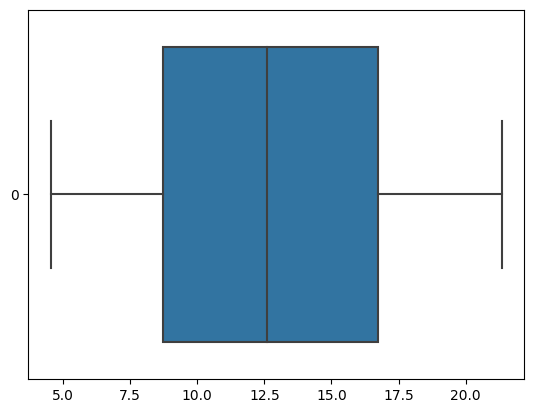

In [12]:
sns.boxplot(data=data['Item_Weight'],orient="h")

In [13]:
data["Item_Identifier"].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [14]:
item_avg_weight = data.pivot_table(values="Item_Weight",index="Item_Identifier")
item_avg_weight

Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
...                      ...
NCZ30                  6.590
NCZ41                 19.850
NCZ42                 10.500
NCZ53                  9.600
NCZ54                 14.650

[1559 rows x 1 columns]

In [15]:
def compute_weights(cols):
    weight=cols[0]
    identifier=cols[1]
    if pd.isnull(weight):
        return item_avg_weight["Item_Weight"][item_avg_weight.index==identifier]
    else:
        return weight

In [16]:
data["Item_Weight"]=data[["Item_Weight","Item_Identifier"]].apply(compute_weights,axis=1).astype(float)

In [17]:
data["Item_Weight"].isnull().sum()

0

In [18]:
outlet_size_mode=data.pivot_table(values="Outlet_Size",columns="Outlet_Type",aggfunc=lambda x:x.mode())
outlet_size_mode

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium

In [19]:
def compute_size_mode(cols):
    size=cols[0]
    type=cols[1]
    if pd.isnull(size):
        return outlet_size_mode.loc["Outlet_Size"][outlet_size_mode.columns==type][0]
    else:
        return size

In [20]:
data["Outlet_Size"]=data[["Outlet_Size","Outlet_Type"]].apply(compute_size_mode,axis=1)

In [21]:
data["Outlet_Size"].isnull().sum()

0

# Feature Engineering

In [22]:
visibility_item_avg=data.pivot_table(values="Item_Visibility",index="Item_Identifier")
visibility_item_avg

Item_Visibility
Item_Identifier                 
DRA12                   0.034938
DRA24                   0.045646
DRA59                   0.133384
DRB01                   0.079736
DRB13                   0.006799
...                          ...
NCZ30                   0.027302
NCZ41                   0.056396
NCZ42                   0.011015
NCZ53                   0.026330
NCZ54                   0.081345

[1559 rows x 1 columns]

In [23]:
def compute_visibility_mean(cols):
    visibility=cols[0]
    identifier=cols[1]
    
    if visibility==0:
        return visibility_item_avg["Item_Visibility"][visibility_item_avg.index==identifier]
    else:
        return visibility

In [24]:
data["Item_Visibility"]=data[["Item_Visibility","Item_Identifier"]].apply(compute_visibility_mean,axis=1).astype(float)

In [25]:
sum(data.Item_Visibility==0)

0

# Years of operation of a store

In [26]:
data["Outlet_Years"]=2013-data["Outlet_Establishment_Year"]

In [27]:
data["Outlet_Years"].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

# Create a broad category of Item_Type

In [28]:
data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.017834   
4           NCD19         8.93          Low Fat         0.009780   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998       Small               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales source  Outlet_Years  
0  Supermarket Type1          3735.1380  train            14  
1  Supermarket Type2           443.4228  train             4  
2  Supermarket Type1          2097.2700  train            14  
3      Grocery Store           732.3800  train            15  
4  Supermarket Type1           994.7052  train            26

In [29]:
data["Item_Type_Combined"]=data["Item_Identifier"].apply(lambda x:x[0:2])

In [30]:
data["Item_Type_Combined"]=data["Item_Type_Combined"].map({"FD":"Food","NC":"Non-Consumable","DR":"Drinks"})

In [31]:
data["Item_Type_Combined"].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

# Change Categories of Item_Fat_Content

In [32]:
data["Item_Fat_Content"]=data["Item_Fat_Content"].replace({"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"})

In [33]:
data["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [34]:
data.loc[data["Item_Type_Combined"]=="Non-Consumable","Item_Fat_Content"]="Non-Edible"

In [35]:
data["Item_Fat_Content"].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

# Feature Transformations

In [36]:
item_visibility_func=lambda x:x["Item_Visibility"]/visibility_item_avg["Item_Visibility"][visibility_item_avg.index==x["Item_Identifier"]][0]
data["Item_Visibility_MeanRatio"]=data.apply(item_visibility_func,axis=1).astype(float)

In [37]:
data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.017834   
4           NCD19         8.93       Non-Edible         0.009780   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998       Small               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales source  Outlet_Years  \
0  Supermarket Type1          3735.1380  train            14   
1  Supermarket Type2           443.4228  train             4   
2  Supermarket Type1          2097.2700  train            14   
3      Grocery Store           732.3800  train            15   
4  Supermarket Type1           994.7052  train            26   

  Item_Type_Combined  Item_Visibility_MeanRatio  
0               Food                   0.931078  
1             Drinks                   0.933420  
2               Food                   0.960069  
3               Food                   1.000000  
4     Non-Consumable                   1.000000

In [38]:
data["Item_Visibility_MeanRatio"].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

# Handling Categorical Variables

In [39]:
le=LabelEncoder()

In [40]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source', 'Outlet_Years',
       'Item_Type_Combined', 'Item_Visibility_MeanRatio'],
      dtype='object')

In [41]:
data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.017834   
4           NCD19         8.93       Non-Edible         0.009780   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998       Small               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales source  Outlet_Years  \
0  Supermarket Type1          3735.1380  train            14   
1  Supermarket Type2           443.4228  train             4   
2  Supermarket Type1          2097.2700  train            14   
3      Grocery Store           732.3800  train            15   
4  Supermarket Type1           994.7052  train            26   

  Item_Type_Combined  Item_Visibility_MeanRatio  
0               Food                   0.931078  
1             Drinks                   0.933420  
2               Food                   0.960069  
3               Food                   1.000000  
4     Non-Consumable                   1.000000

In [42]:
cat_var=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type',
       'Outlet_Type','Item_Type_Combined']
for i in cat_var:
    data[i]=le.fit_transform(data[i])

In [43]:
data.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30                 0         0.016047   
1           DRC01         5.92                 2         0.019278   
2           FDN15        17.50                 0         0.016760   
3           FDX07        19.20                 2         0.017834   
4           NCD19         8.93                 1         0.009780   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0                       1999            1                     0            1   
1                       2009            1                     2            2   
2                       1999            1                     0            1   
3                       1998            2                     2            0   
4                       1987            0                     2            1   

   Item_Outlet_Sales source  Outlet_Years  Item_Type_Combined  \
0          3735.1380  train            14                   1   
1           443.4228  train             4                   0   
2          2097.2700  train            14                   1   
3           732.3800  train            15                   1   
4           994.7052  train            26                   2   

   Item_Visibility_MeanRatio  
0                   0.931078  
1                   0.933420  
2                   0.960069  
3                   1.000000  
4                   1.000000

# Apply One Hot Encoding

In [44]:
data=pd.get_dummies(data,columns=["Item_Fat_Content","Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Type_Combined"])

In [45]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Visibility_MeanRatio    float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
d

In [46]:
data.drop(["Item_Identifier","Item_Type","Outlet_Identifier","Outlet_Establishment_Year"],axis=1,inplace=True)

# Data Partitioning

In [47]:
train_df=data.loc[data["source"]=="train"]
test_df=data.loc[data["source"]=="test"]

In [48]:
train_df.drop(["source"],axis=1,inplace=True)
test_df.drop(["source","Item_Outlet_Sales"],axis=1,inplace=True)

In [49]:
train_df.head()

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  Outlet_Years  \
0         9.30         0.016047  249.8092          3735.1380            14   
1         5.92         0.019278   48.2692           443.4228             4   
2        17.50         0.016760  141.6180          2097.2700            14   
3        19.20         0.017834  182.0950           732.3800            15   
4         8.93         0.009780   53.8614           994.7052            26   

   Item_Visibility_MeanRatio  Item_Fat_Content_0  Item_Fat_Content_1  \
0                   0.931078                   1                   0   
1                   0.933420                   0                   0   
2                   0.960069                   1                   0   
3                   1.000000                   0                   0   
4                   1.000000                   0                   1   

   Item_Fat_Content_2  Outlet_Size_0  ...  Outlet_Location_Type_0  \
0                   0              0  ...                       1   
1                   1              0  ...                       0   
2                   0              0  ...                       1   
3                   1              0  ...                       0   
4                   0              1  ...                       0   

   Outlet_Location_Type_1  Outlet_Location_Type_2  Outlet_Type_0  \
0                       0                       0              0   
1                       0                       1              0   
2                       0                       0              0   
3                       0                       1              1   
4                       0                       1              0   

   Outlet_Type_1  Outlet_Type_2  Outlet_Type_3  Item_Type_Combined_0  \
0              1              0              0                     0   
1              0              1              0                     1   
2              1              0              0                     0   
3              0              0              0                     0   
4              1              0              0                     0   

   Item_Type_Combined_1  Item_Type_Combined_2  
0                     1                     0  
1                     0                     0  
2                     1                     0  
3                     1                     0  
4                     0                     1  

[5 rows x 22 columns]

In [50]:
test_df.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Years  \
8523       20.750         0.007565  107.8622            14   
8524        8.300         0.038428   87.3198             6   
8525       14.600         0.099575  241.7538            15   
8526        7.315         0.015388  155.0340             6   
8527       13.600         0.118599  234.2300            28   

      Item_Visibility_MeanRatio  Item_Fat_Content_0  Item_Fat_Content_1  \
8523                   1.029192                   1                   0   
8524                   1.130311                   0                   0   
8525                   1.735215                   0                   1   
8526                   1.291577                   1                   0   
8527                   0.917824                   0                   0   

      Item_Fat_Content_2  Outlet_Size_0  Outlet_Size_1  ...  \
8523                   0              0              1  ...   
8524                   1              0              0  ...   
8525                   0              0              0  ...   
8526                   0              0              0  ...   
8527                   1              0              1  ...   

      Outlet_Location_Type_0  Outlet_Location_Type_1  Outlet_Location_Type_2  \
8523                       1                       0                       0   
8524                       0                       1                       0   
8525                       0                       0                       1   
8526                       0                       1                       0   
8527                       0                       0                       1   

      Outlet_Type_0  Outlet_Type_1  Outlet_Type_2  Outlet_Type_3  \
8523              0              1              0              0   
8524              0              1              0              0   
8525              1              0              0              0   
8526              0              1              0              0   
8527              0              0              0              1   

      Item_Type_Combined_0  Item_Type_Combined_1  Item_Type_Combined_2  
8523                     0                     1                     0  
8524                     0                     1                     0  
8525                     0                     0                     1  
8526                     0                     1                     0  
8527                     0                     1                     0  

[5 rows x 21 columns]

In [52]:
train_df.to_csv("train_modified.csv",index=False)
test_df.to_csv("test_modified.csv",index=False)

# EDA

In [53]:
profile=ProfileReport(train_df,title="Store Sales Analysis",explorative=True)

In [54]:
profile.to_file("EDA Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [55]:
profile.to_notebook_iframe()

In [57]:
train_data_mod=pd.read_csv("train_modified.csv")

In [58]:
x_train_mod=train_data_mod.drop(["Item_Outlet_Sales"],axis=1)
y_train_mod=train_data_mod["Item_Outlet_Sales"]

In [59]:
x_train_mod.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Years  \
0         9.30         0.016047  249.8092            14   
1         5.92         0.019278   48.2692             4   
2        17.50         0.016760  141.6180            14   
3        19.20         0.017834  182.0950            15   
4         8.93         0.009780   53.8614            26   

   Item_Visibility_MeanRatio  Item_Fat_Content_0  Item_Fat_Content_1  \
0                   0.931078                   1                   0   
1                   0.933420                   0                   0   
2                   0.960069                   1                   0   
3                   1.000000                   0                   0   
4                   1.000000                   0                   1   

   Item_Fat_Content_2  Outlet_Size_0  Outlet_Size_1  ...  \
0                   0              0              1  ...   
1                   1              0              1  ...   
2                   0              0              1  ...   
3                   1              0              0  ...   
4                   0              1              0  ...   

   Outlet_Location_Type_0  Outlet_Location_Type_1  Outlet_Location_Type_2  \
0                       1                       0                       0   
1                       0                       0                       1   
2                       1                       0                       0   
3                       0                       0                       1   
4                       0                       0                       1   

   Outlet_Type_0  Outlet_Type_1  Outlet_Type_2  Outlet_Type_3  \
0              0              1              0              0   
1              0              0              1              0   
2              0              1              0              0   
3              1              0              0              0   
4              0              1              0              0   

   Item_Type_Combined_0  Item_Type_Combined_1  Item_Type_Combined_2  
0                     0                     1                     0  
1                     1                     0                     0  
2                     0                     1                     0  
3                     0                     1                     0  
4                     0                     0                     1  

[5 rows x 21 columns]

In [60]:
y_train_mod.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

# train test split

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x_train_mod,y_train_mod,random_state=101,test_size=0.2)

# Create Random Forest model with sklearn

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train,y_train)

RandomForestRegressor()

In [65]:
reg_rf.score(x_test,y_test)

0.5394012565033963

In [66]:
y_pred=reg_rf.predict(x_test)

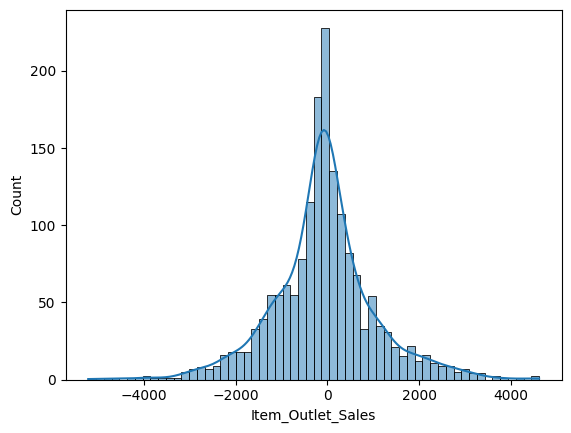

In [68]:
sns.histplot(y_test-y_pred,kde=True)
plt.show()

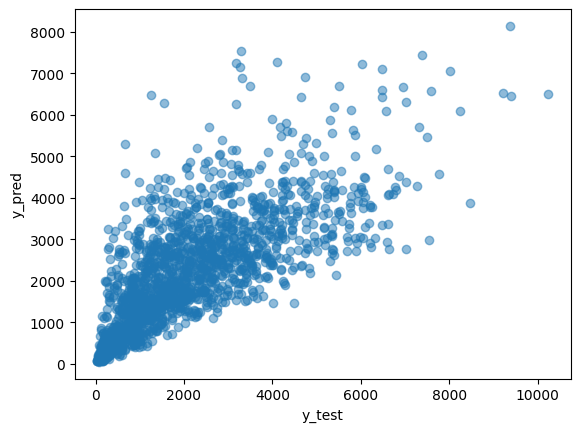

In [69]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [70]:
from sklearn import metrics

In [75]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))
print("Mean Square Error:",metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Square Error:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 786.4650739319648
Mean Square Error: 1255299.5746737272
Root Mean Square Error: 1120.4015238626405


# Hyper Parameter Tuning

In [76]:
from sklearn.model_selection import RandomizedSearchCV

In [79]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [80]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

In [84]:
rf_random= RandomizedSearchCV(estimator = reg_rf, param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=1)

In [85]:
rf_random.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error')

In [86]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 15,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 30}

In [87]:
prediction=rf_random.predict(x_test)

In [88]:
metrics.r2_score(y_test,prediction)

0.5763112610052237

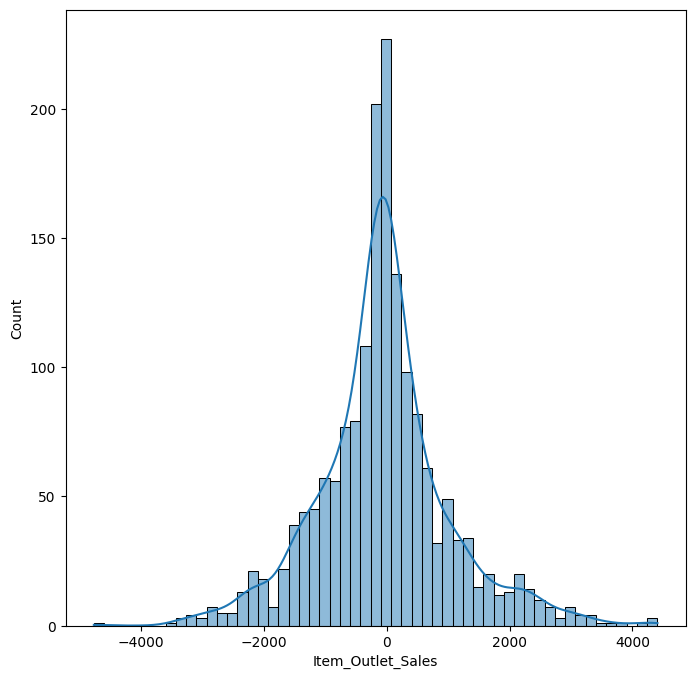

In [89]:
plt.figure(figsize=(8,8))
sns.histplot(y_test-prediction,kde=True)
plt.show()

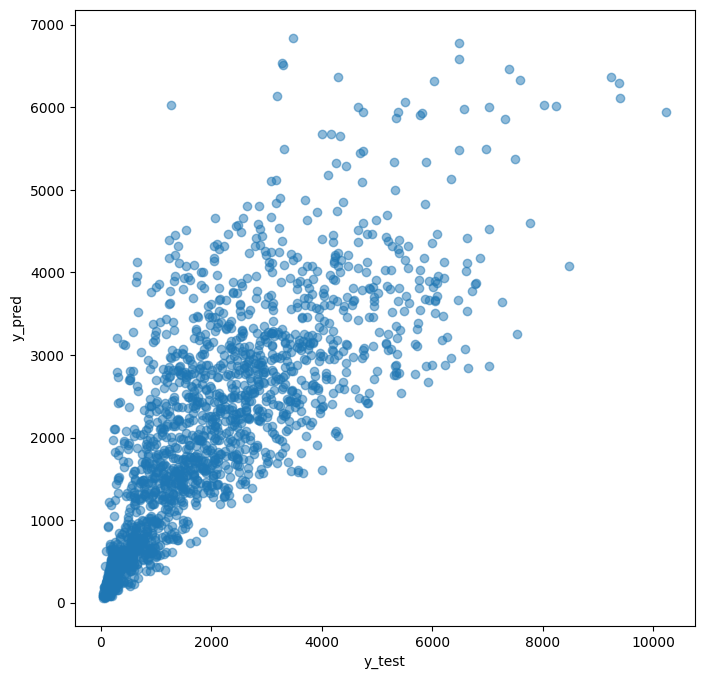

In [90]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [91]:
print('R2:',metrics.r2_score(y_test,prediction))
print('MAE:',metrics.mean_absolute_error(y_test,prediction))
print('MSE:',metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

R2: 0.5763112610052237
MAE: 757.183365323065
MSE: 1154706.3498624424
RMSE: 1074.5726359173875


In [92]:
import pickle
file=open('rf.pkl','wb')
pickle.dump(rf_random,file)
file.close()